In [27]:
import numpy as np 
import pandas as pd 
import re
import requests
from bs4 import BeautifulSoup 
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

pd.set_option('display.max_rows', 200)
import warnings
warnings.filterwarnings("ignore")
print("import complete")

import complete


In [2]:
# reading the cik_list file
cik_list = pd.read_excel("cik_list.xlsx")
cik_list

,CIK,CONAME,FYRMO,FDATE,FORM,SECFNAME
0,3662,SUNBEAM CORP/FL/,199803,1998-03-06,10-K405,edgar/data/3662/0000950170-98-000413.txt
1,3662,SUNBEAM CORP/FL/,199805,1998-05-15,10-Q,edgar/data/3662/0000950170-98-001001.txt
2,3662,SUNBEAM CORP/FL/,199808,1998-08-13,NT 10-Q,edgar/data/3662/0000950172-98-000783.txt
3,3662,SUNBEAM CORP/FL/,199811,1998-11-12,10-K/A,edgar/data/3662/0000950170-98-002145.txt
4,3662,SUNBEAM CORP/FL/,199811,1998-11-16,NT 10-Q,edgar/data/3662/0000950172-98-001203.txt
...,...,...,...,...,...,...
147,12239,SPHERIX INC,200704,2007-04-02,10-K,edgar/data/12239/0001104659-07-024804.txt
148,12239,SPHERIX INC,200705,2007-05-16,NT 10-Q,edgar/data/12239/0001104659-07-040463.txt
149,12239,SPHERIX INC,200705,2007-05-18,10-Q,edgar/data/12239/0001104659-07-041441.txt
150,12239,SPHERIX INC,200705,2007-05-23,10-K/A,edgar/data/12239/0001104659-07-042333.txt


In [3]:
# adding url prefix to the SECFNAME
url_prefix = "https://www.sec.gov/Archives/"
cik_list.SECFNAME = url_prefix + cik_list.SECFNAME
cik_list

,CIK,CONAME,FYRMO,FDATE,FORM,SECFNAME
0,3662,SUNBEAM CORP/FL/,199803,1998-03-06,10-K405,https://www.sec.gov/Archives/edgar/data/3662/0...
1,3662,SUNBEAM CORP/FL/,199805,1998-05-15,10-Q,https://www.sec.gov/Archives/edgar/data/3662/0...
2,3662,SUNBEAM CORP/FL/,199808,1998-08-13,NT 10-Q,https://www.sec.gov/Archives/edgar/data/3662/0...
3,3662,SUNBEAM CORP/FL/,199811,1998-11-12,10-K/A,https://www.sec.gov/Archives/edgar/data/3662/0...
4,3662,SUNBEAM CORP/FL/,199811,1998-11-16,NT 10-Q,https://www.sec.gov/Archives/edgar/data/3662/0...
...,...,...,...,...,...,...
147,12239,SPHERIX INC,200704,2007-04-02,10-K,https://www.sec.gov/Archives/edgar/data/12239/...
148,12239,SPHERIX INC,200705,2007-05-16,NT 10-Q,https://www.sec.gov/Archives/edgar/data/12239/...
149,12239,SPHERIX INC,200705,2007-05-18,10-Q,https://www.sec.gov/Archives/edgar/data/12239/...
150,12239,SPHERIX INC,200705,2007-05-23,10-K/A,https://www.sec.gov/Archives/edgar/data/12239/...


In [4]:
# reading the Master Dictionary file
mast_dict = pd.read_excel("LoughranMcDonald_MasterDictionary_2018.xlsx")
mast_dict

,Word,Sequence Number,Word Count,Word Proportion,Average Proportion,Std Dev,Doc Count,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Modal,Irr_Verb,Harvard_IV,Syllables,Source
0,AARDVARK,1,277,1.480368e-08,1.239377e-08,3.564730e-06,84,0,0,0,0,0,0,0,0,0,0,2,12of12inf
1,AARDVARKS,2,3,1.603287e-10,9.725110e-12,9.863549e-09,1,0,0,0,0,0,0,0,0,0,0,2,12of12inf
2,ABACI,3,8,4.275431e-10,1.386497e-10,6.225591e-08,7,0,0,0,0,0,0,0,0,0,0,3,12of12inf
3,ABACK,4,12,6.413147e-10,3.159061e-10,9.383557e-08,12,0,0,0,0,0,0,0,0,0,0,2,12of12inf
4,ABACUS,5,7250,3.874610e-07,3.681624e-07,3.366553e-05,914,0,0,0,0,0,0,0,0,0,0,3,12of12inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86481,ZYGOTE,86482,46,2.458373e-09,9.686336e-10,2.064395e-07,31,0,0,0,0,0,0,0,0,0,0,2,12of12inf
86482,ZYGOTES,86483,1,5.344289e-11,2.041851e-11,2.070917e-08,1,0,0,0,0,0,0,0,0,0,0,2,12of12inf
86483,ZYGOTIC,86484,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,3,12of12inf
86484,ZYMURGIES,86485,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,3,12of12inf


In [5]:
# positive and negative words
positive_word=[word for word in mast_dict[mast_dict['Positive']!=0]['Word']]
negative_word=[word for word in mast_dict[mast_dict['Negative']!=0]['Word']]

In [6]:
len(positive_word),len(negative_word)

(354, 2355)

In [7]:
# stop words
stop = open("StopWords_Generic.txt","r")
stop_words = stop.read().lower()
stop_words = stop_words.split("\n")
len(stop_words)

121

In [8]:
# uncertainity words
uncertainity_word = pd.read_excel("uncertainty_dictionary.xlsx")
uncertainity_word = list(uncertainity_word['Word'])
len(uncertainity_word)

297

In [9]:
# constrainting words
constrainting_word = pd.read_excel("constraining_dictionary.xlsx")
constrainting_word = list(constrainting_word['Word'])
len(constrainting_word)

184

In [10]:
# now let's fetch the reports from the links from the cik file

In [11]:
links = [i for i in cik_list.SECFNAME]
links

['https://www.sec.gov/Archives/edgar/data/3662/0000950170-98-000413.txt',
 'https://www.sec.gov/Archives/edgar/data/3662/0000950170-98-001001.txt',
 'https://www.sec.gov/Archives/edgar/data/3662/0000950172-98-000783.txt',
 'https://www.sec.gov/Archives/edgar/data/3662/0000950170-98-002145.txt',
 'https://www.sec.gov/Archives/edgar/data/3662/0000950172-98-001203.txt',
 'https://www.sec.gov/Archives/edgar/data/3662/0000950170-98-002278.txt',
 'https://www.sec.gov/Archives/edgar/data/3662/0000950170-98-002401.txt',
 'https://www.sec.gov/Archives/edgar/data/3662/0000950170-98-002402.txt',
 'https://www.sec.gov/Archives/edgar/data/3662/0000950172-99-000362.txt',
 'https://www.sec.gov/Archives/edgar/data/3662/0000950170-99-000775.txt',
 'https://www.sec.gov/Archives/edgar/data/3662/0000950172-99-000584.txt',
 'https://www.sec.gov/Archives/edgar/data/3662/0000950170-99-001005.txt',
 'https://www.sec.gov/Archives/edgar/data/3662/0000950172-99-001074.txt',
 'https://www.sec.gov/Archives/edgar/d

In [12]:
#extracting the financial reports using beautiful soup
financial_reports=[]
for i in links:
    page=requests.get(i)
    data=BeautifulSoup(page.text, "html.parser")
    financial_reports.append(data.text)
len(financial_reports)

152

Cleaning the text

In [13]:
# intialising lemmatizer for text cleaning
wordnet=WordNetLemmatizer()

In [14]:
# defining a function to clean the text and fetching the text data from the files
def clean_text(text):
    # tokenizing into sentences
    sent = sent_tokenize(text)
    num_sent = len(sent)
    
    # tokeninsing to words and fetching text using regular expression
    word = re.sub(r"[^A-Za-z]"," ",text.lower())
    words = word_tokenize(word)
    
    # cleaning the words by lemmatising and removing the stop words
    cleaned_words = [wordnet.lemmatize(i) for i in words if i not in stop_words]
    num_words = len(cleaned_words)
    cleaned_text = ' '.join(cleaned_words)
    return num_words,num_sent,cleaned_words,cleaned_text

In [15]:
# function to count the words from master dictionary and extracted data
def count_word(exst_word,new_word):
    exst_word = [i.lower() for i in exst_word]
    count = 0
    for i in new_word:
        if(i in exst_word):
            count+=1
    return count

In [16]:
# function to determine polarity score
def polarity_score(positive, negative):
    polarity=(positive - negative)/((positive + negative)+ 0.000001)
    return polarity

In [17]:
#function to determine subjectivity score
def subjectivity_score(positive,negative,total_words):
    subjectivity= (positive + negative)/ ((total_words) + 0.000001)
    return subjectivity

In [18]:
# function for sentiment score categorization of the report
def sentiment_score_categorization(polarity):
    if(polarity<-0.5):
        return "most negative"
    elif(polarity>=-0.5 and polarity<0):
        return "negative"
    elif(polarity==0):
        return "neutral"
    elif(polarity>0 and polarity<0.5):
        return "positive"
    else:
        return "very positive"

In [19]:
# function to count number of syllables to get differentiate between complex and non complex words
def num_syllables(words):
    num=0
    for word in words:
        word = word.lower()
        count = 0
        vowels = "aeiouy"
        if word[0] in vowels:
            count += 1
        for index in range(1, len(word)):
            if word[index] in vowels and word[index - 1] not in vowels:
                count += 1
        if word.endswith("e"):
            count -= 1
        if count == 0:
            count += 1
        if count>2:
            num+=1
    return num

In [20]:
# creating a new dataframe to store the variables 
df = pd.DataFrame()

In [21]:
# creating some empty lists for the variables required
pos_sc =[]
neg_sc =[]
pol_sc =[]
avg_sent_len=[]
perc_of_comp_words=[]
fog_ind=[]
com_word_ct =[]
word_ct=[]
unce_sc=[]
const_sc=[]
pos_word_prop=[]
neg_word_prop=[]
unce_word_prop=[]
const_word_prop=[]
const_words_whole_report =[]

# running a loop on financial reports
for i in range(len(financial_reports)):
    
    # getting cleaned words
    words = clean_text(financial_reports[i])[2]
    
    # calculating number of sentences
    num_sentences = clean_text(financial_reports[i])[1]
    
    # calculating number of words
    num_words = clean_text(financial_reports[i])[0]
    word_ct.append(num_words)
    
    # calculating positive scores
    positive_score = count_word(positive_word,words)
    pos_sc.append(positive_score)
    
    # calculating negative scores
    negative_score = count_word(negative_word,words)
    neg_sc.append(negative_score)
    
    # calculating polarity score
    polarity = polarity_score(positive_score,negative_score)
    pol_sc.append(polarity)
    
    #calculating subjectivity score
    subjectivity = subjectivity_score(positive_score,negative_score,num_words)
    
    #calculating average sentence length
    average_sentence_length = (num_words/num_sentences)
    avg_sent_len.append(average_sentence_length)
    
    # getting count of complex words
    num_complex_words = num_syllables(words)
    com_word_ct.append(num_complex_words)
    
    # getting percentage of complex words
    percentage_complex_words = (num_complex_words/num_sentences)
    perc_of_comp_words.append(percentage_complex_words)
    
    # calculating fog index
    fog_index = 0.4*(average_sentence_length + percentage_complex_words)
    fog_ind.append(fog_index)
    
    # calculating uncertainity score
    uncertainty_score = count_word(uncertainity_word,words)
    unce_sc.append(uncertainty_score)
    
    # calculating contraining score
    constraining_score = count_word(constrainting_word,words)
    const_sc.append(constraining_score)
    
    # checking positive word proportion
    positive_word_proportion = (positive_score/num_words)
    pos_word_prop.append(positive_word_proportion)
    
    # checking negative word proportion
    negative_word_proportion = (positive_score/num_words)
    neg_word_prop.append(negative_word_proportion)
    
    # checking uncertainty word proportion
    uncertainty_word_proportion = (uncertainty_score/num_words)
    unce_word_prop.append(uncertainty_word_proportion)
    
    # checking constraining word proportion
    constraining_word_proportion = (constraining_score/num_words)
    const_word_prop.append(constraining_word_proportion)
    
    

In [22]:
# storing the variales in datframe
df['positive_score'] = pos_sc
df['negative_score'] = neg_sc
df['polarity_score'] = pol_sc
df['average_sentence_length'] = avg_sent_len
df['percentage_of_complex_words'] = perc_of_comp_words
df['fog_index'] = fog_ind
df['complex_word_count'] = com_word_ct
df['word_count'] = word_ct
df['uncertainty_score'] = unce_sc
df['constraining_score'] = const_sc
df['positive_word_proportion'] = pos_word_prop
df['negative_word_proportion'] = neg_word_prop
df['uncertainty_word_proportion'] = unce_word_prop
df['constraining_word_proportion'] = const_word_prop

In [23]:
df

,positive_score,negative_score,polarity_score,average_sentence_length,percentage_of_complex_words,fog_index,complex_word_count,word_count,uncertainty_score,constraining_score,positive_word_proportion,negative_word_proportion,uncertainty_word_proportion,constraining_word_proportion
0,1168,2934,-0.430522,23.709311,9.792329,13.400656,38807,93960,930,1495,0.012431,0.012431,0.009898,0.015911
1,6,10,-0.250000,15.050000,4.450000,7.800000,89,301,4,5,0.019934,0.019934,0.013289,0.016611
2,6,10,-0.250000,15.050000,4.450000,7.800000,89,301,4,5,0.019934,0.019934,0.013289,0.016611
3,6,10,-0.250000,15.050000,4.450000,7.800000,89,301,4,5,0.019934,0.019934,0.013289,0.016611
4,3,8,-0.454545,29.360000,8.600000,15.184000,215,734,10,4,0.004087,0.004087,0.013624,0.005450
5,6,10,-0.250000,15.050000,4.450000,7.800000,89,301,4,5,0.019934,0.019934,0.013289,0.016611
6,6,10,-0.250000,15.050000,4.450000,7.800000,89,301,4,5,0.019934,0.019934,0.013289,0.016611
7,6,10,-0.250000,15.050000,4.450000,7.800000,89,301,4,5,0.019934,0.019934,0.013289,0.016611
8,6,10,-0.250000,15.050000,4.450000,7.800000,89,301,4,5,0.019934,0.019934,0.013289,0.016611
9,6,10,-0.250000,15.100000,4.450000,7.820000,89,302,4,5,0.019868,0.019868,0.013245,0.016556


In [26]:
# concatinating the dataframes to get output data with all the variables
output_df = pd.concat([cik_list,df],axis=1)
output_df

,CIK,CONAME,FYRMO,FDATE,FORM,SECFNAME,positive_score,negative_score,polarity_score,average_sentence_length,percentage_of_complex_words,fog_index,complex_word_count,word_count,uncertainty_score,constraining_score,positive_word_proportion,negative_word_proportion,uncertainty_word_proportion,constraining_word_proportion
0,3662,SUNBEAM CORP/FL/,199803,1998-03-06,10-K405,https://www.sec.gov/Archives/edgar/data/3662/0...,1168,2934,-0.430522,23.709311,9.792329,13.400656,38807,93960,930,1495,0.012431,0.012431,0.009898,0.015911
1,3662,SUNBEAM CORP/FL/,199805,1998-05-15,10-Q,https://www.sec.gov/Archives/edgar/data/3662/0...,6,10,-0.250000,15.050000,4.450000,7.800000,89,301,4,5,0.019934,0.019934,0.013289,0.016611
2,3662,SUNBEAM CORP/FL/,199808,1998-08-13,NT 10-Q,https://www.sec.gov/Archives/edgar/data/3662/0...,6,10,-0.250000,15.050000,4.450000,7.800000,89,301,4,5,0.019934,0.019934,0.013289,0.016611
3,3662,SUNBEAM CORP/FL/,199811,1998-11-12,10-K/A,https://www.sec.gov/Archives/edgar/data/3662/0...,6,10,-0.250000,15.050000,4.450000,7.800000,89,301,4,5,0.019934,0.019934,0.013289,0.016611
4,3662,SUNBEAM CORP/FL/,199811,1998-11-16,NT 10-Q,https://www.sec.gov/Archives/edgar/data/3662/0...,3,8,-0.454545,29.360000,8.600000,15.184000,215,734,10,4,0.004087,0.004087,0.013624,0.005450
5,3662,SUNBEAM CORP/FL/,199811,1998-11-25,10-Q/A,https://www.sec.gov/Archives/edgar/data/3662/0...,6,10,-0.250000,15.050000,4.450000,7.800000,89,301,4,5,0.019934,0.019934,0.013289,0.016611
6,3662,SUNBEAM CORP/FL/,199812,1998-12-22,10-Q,https://www.sec.gov/Archives/edgar/data/3662/0...,6,10,-0.250000,15.050000,4.450000,7.800000,89,301,4,5,0.019934,0.019934,0.013289,0.016611
7,3662,SUNBEAM CORP/FL/,199812,1998-12-22,10-Q,https://www.sec.gov/Archives/edgar/data/3662/0...,6,10,-0.250000,15.050000,4.450000,7.800000,89,301,4,5,0.019934,0.019934,0.013289,0.016611
8,3662,SUNBEAM CORP/FL/,199903,1999-03-31,NT 10-K,https://www.sec.gov/Archives/edgar/data/3662/0...,6,10,-0.250000,15.050000,4.450000,7.800000,89,301,4,5,0.019934,0.019934,0.013289,0.016611
9,3662,SUNBEAM CORP/FL/,199905,1999-05-11,10-K,https://www.sec.gov/Archives/edgar/data/3662/0...,6,10,-0.250000,15.100000,4.450000,7.820000,89,302,4,5,0.019868,0.019868,0.013245,0.016556


### Visualisation and Analysis

Distribution of the variables

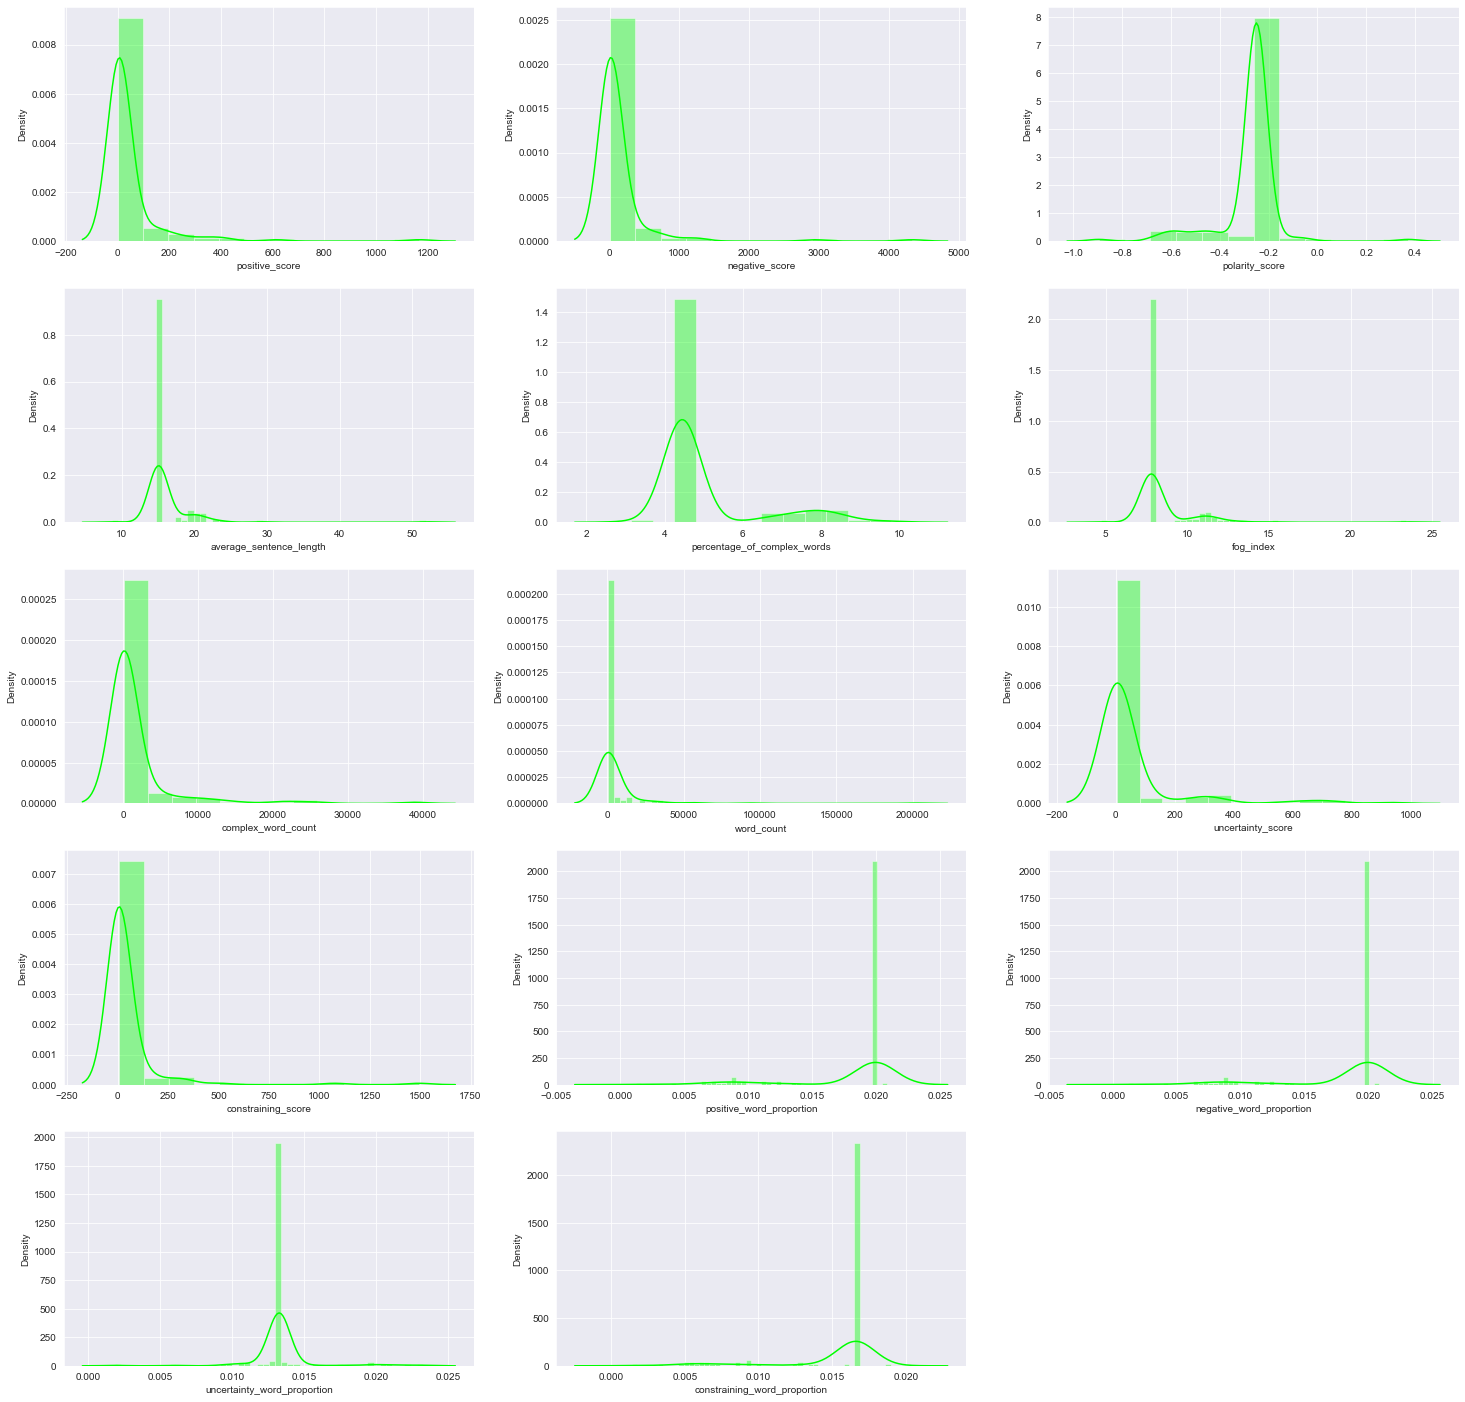

In [83]:
cols = ['positive_score',
       'negative_score', 'polarity_score', 'average_sentence_length',
       'percentage_of_complex_words', 'fog_index', 'complex_word_count',
       'word_count', 'uncertainty_score', 'constraining_score',
       'positive_word_proportion', 'negative_word_proportion',
       'uncertainty_word_proportion', 'constraining_word_proportion']
plt.figure(figsize=(25,25))
plot = 1
for var in cols:
    plt.subplot(5,3,plot)
    sns.distplot(df[var],color='lime')
    plot+=1
plt.show()

Visualisation of FORMS with different derived components

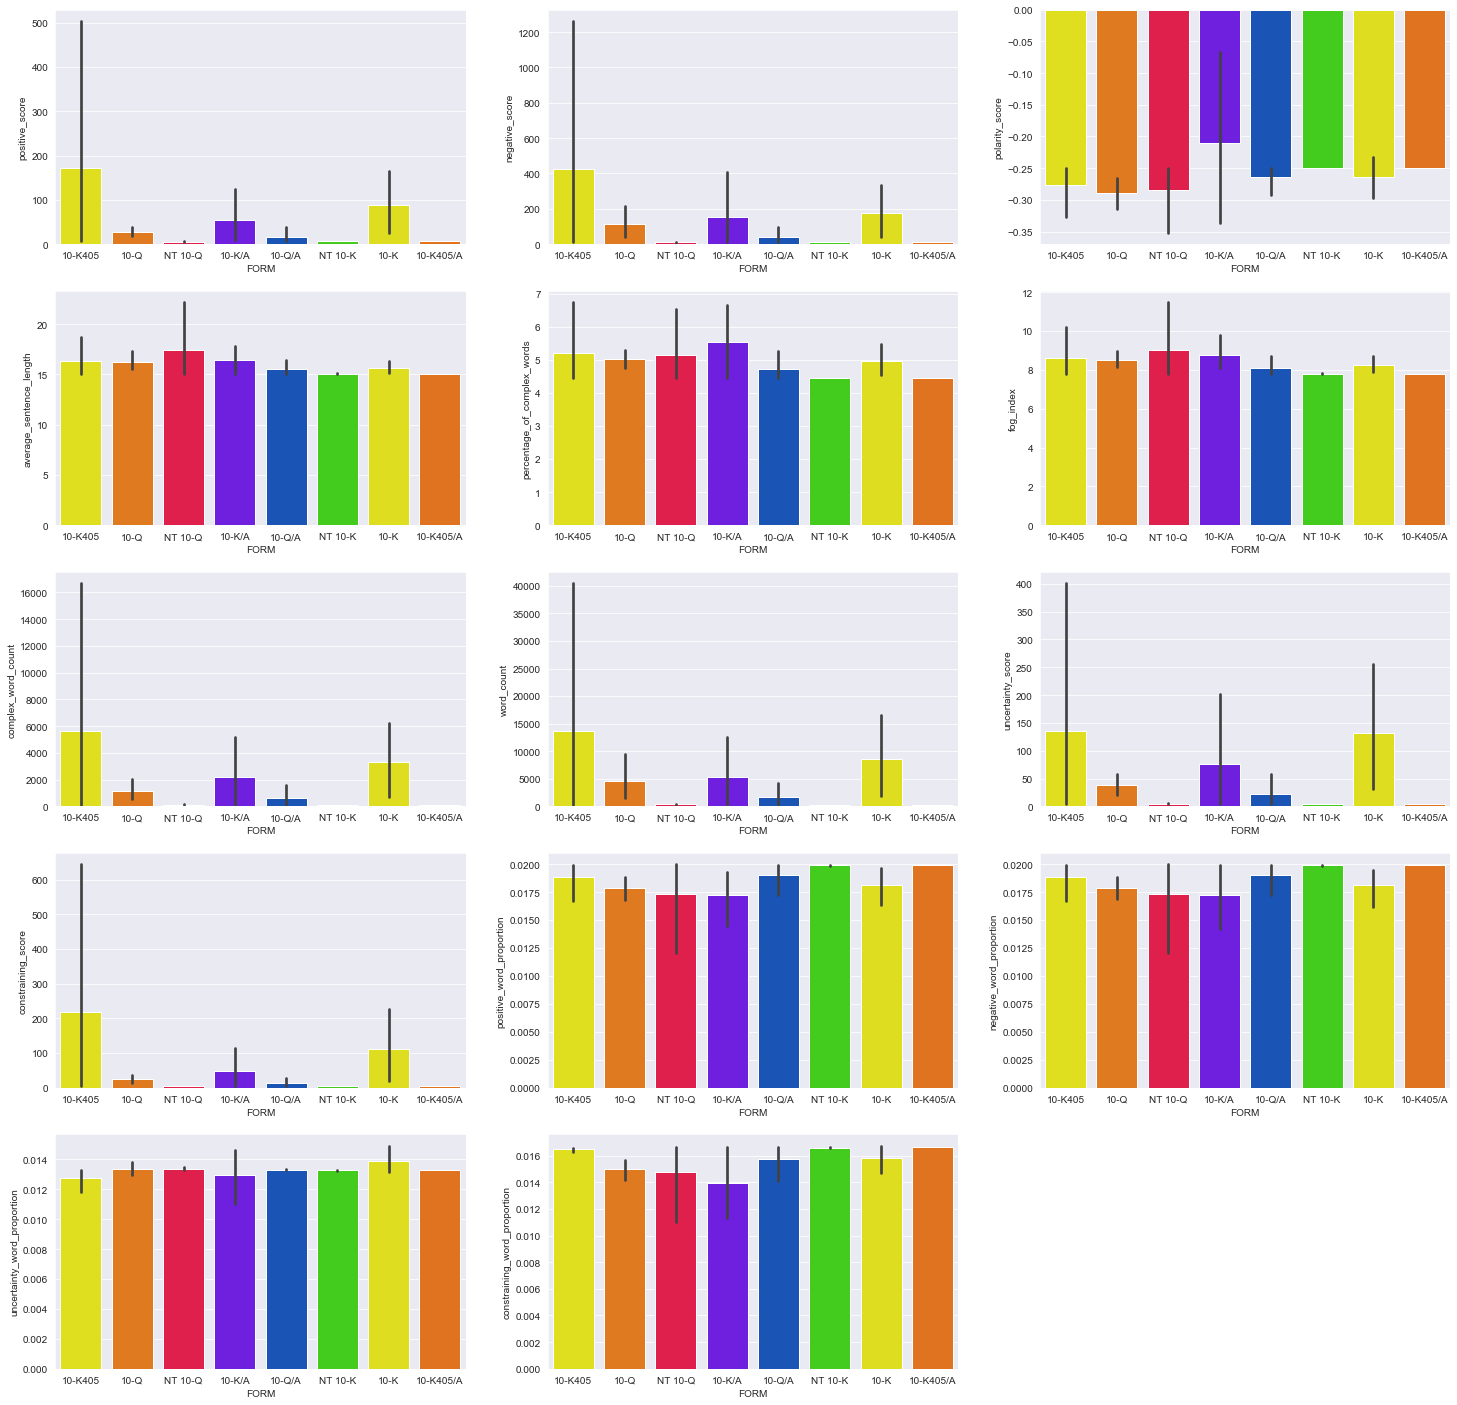

In [85]:
plt.figure(figsize=(25,25))
plot = 1
for i in df.columns:
    plt.subplot(5,3,plot)
    sns.barplot(x='FORM',y=i,data=output_df,palette='prism_r')
    plot+=1
plt.show()

creating a pivot report of company name and form with the variable

In [77]:
pd.pivot_table(output_df, index = ['CONAME','FORM'], values = ['positive_score',
       'negative_score', 'polarity_score', 'average_sentence_length',
       'percentage_of_complex_words', 'fog_index', 'complex_word_count',
       'word_count', 'uncertainty_score', 'constraining_score',
       'positive_word_proportion', 'negative_word_proportion',
       'uncertainty_word_proportion', 'constraining_word_proportion'])

average_sentence_length  \
CONAME                     FORM                                 
ALLIS CHALMERS ENERGY INC. 10-K                     16.042051   
                           10-K/A                   16.480808   
                           10-Q                     15.588788   
                           10-Q/A                   15.075000   
AMERADA HESS CORP          10-K                     17.554735   
                           10-K/A                   15.050000   
                           10-Q                     15.643971   
AMERCO /NV/                10-K                     15.050000   
                           10-Q                     15.016667   
                           10-Q/A                   15.000000   
                           NT 10-K                  15.050000   
AMERICAN AIRLINES INC      10-K                     16.517957   
                           10-Q                     21.907774   
                           10-Q/A                   15.050000   
AMERICAN EXPRESS CO        10-Q                     15.025000   
AMERICAN PAD & PAPER CO    10-K                     15.025000   
                           10-Q                     15.890786   
                           10-Q/A                   15.050000   
AMES DEPARTMENT STORES INC 10-K                     15.025000   
                           10-Q                     15.041667   
AMR CORP                   10-K                     15.066667   
                           10-K405                  15.066667   
                           10-Q                     16.038668   
                           10-Q/A                   15.083333   
                           NT 10-K                  15.100000   
ANACOMP INC                10-K                     15.050000   
                           10-K405                  15.050000   
                           10-Q                     15.682558   
AT&T CORP                  10-K                     17.410838   
                           10-K/A                   15.050000   
                           10-K405                  15.050000   
                           10-K405/A                15.050000   
                           10-Q                     18.473667   
                           10-Q/A                   18.125835   
BETHLEHEM STEEL CORP /DE/  10-K                     15.050000   
                           10-K/A                   17.656783   
                           10-K405                  15.100000   
                           10-Q                     15.308513   
SPHERIX INC                10-K                     15.050000   
                           10-K/A                   15.050000   
                           10-Q                     15.075000   
                           NT 10-Q                  15.050000   
SUNBEAM CORP/FL/           10-K                     15.100000   
                           10-K/A                   17.086997   
                           10-K405                  23.709311   
                           10-Q                     15.041667   
                           10-Q/A                   15.033333   
                           NT 10-K                  15.050000   
                           NT 10-Q                  17.892000   

                                      complex_word_count  constraining_score  \
CONAME                     FORM                                                
ALLIS CHALMERS ENERGY INC. 10-K              4313.333333          103.333333   
                           10-K/A            1778.333333           34.666667   
                           10-Q               937.000000           22.833333   
                           10-Q/A              89.000000            5.000000   
AMERADA HESS CORP          10-K             11413.000000          540.000000   
                           10-K/A              89.000000            5.000000   
                           10-Q               401.428571           10.142857   
AM